# **Propagation et croissance de la population de frelons à pattes jaunes**

**NOM**    PLUSQUELLEC <br>
**PRÉNOM** *Valérie*

---

Sources extérieures au cours utilisées pour l'élaboration du projet

$^{(1)}$  *Rapid spread of the invasive yellow-legged hornet in France: the role of human-mediated dispersal and the effects of control measures* \\ Christelle Robinet, Christelle Suppo, Eric Darrouzet \\ *Journal of Applied Ecology* 2016 \\
[lien](https://besjournals.onlinelibrary.wiley.com/doi/10.1111/1365-2664.12724)

$^{(2)}$ *Frelon asiatique : Un état des lieux des enjeux français, vingt ans après son invasion* \\ Laura Alvarez Y Lopez \\ *Université de Limoges* 2024 \\
[lien](https://cdn.unilim.fr/files/theses-exercice/P20243325.pdf)

$^{(3)}$ *Equations aux dérivées partielles : Approfondissement* \\ Geroges Kopfler \\ *Université Paris Cité* 2009 \\ [lien](https://helios2.mi.parisdescartes.fr/~gk/EDP/cours_edp09.pdf)


$^{(4)}$ *Reaction-Diffusion Models and Bifurcation Theory* \\ Junping Shi \\ *College of Willian and Mary, USA* 2013 \\ [lien](https://jxshix.people.wm.edu/2013-taiwan/lecture3-taiwan.pdf)

---


## **Introduction**

Depuis son apparition en France en 2004, le frelon à pattes jaunes (communément appelé frelon asiatique) a envahi l'Europe et pose problème : cette espèce prédatrice met en péril la biodiversité locale, et le nombre de colonies augmente rapidement d'année en année.
Une étude$^{(1)}$  publiée en 2016 a démontré la capacité de propagation rapide et efficace du frelon asiatique en France. 

Ce projet a pour objectif de modéliser la propagation et l'évolution de la population de frelons au sein d'un territoire au fil des années. Il reposera sur la résolution d'une équation aux dérivées partielles à l'aide de méthodes numériques vues en cours.

## **Modèle mathématique**

### Equation de type réaction-diffusion

Le modèle de réaction-diffusion$^{(3)}$ est communément utilisé pour décrire la propagation locale des éspèces invasives. Ce modèle permet d'étudier non seulement la dispersion d'une population, mais aussi sa croissance.

Ce modèle peut être exprimé en utilisant l'équation de Fisher 2D : 
$$
\frac{\partial u}{\partial t} = D∆u + ru(1 - \frac{u}{K})
$$
Où:
* $u = u((x,y),t)$ est la densité de nids de frelons par $km^{2}$ au temps $t$ et au point $(x,y)$
* $D$ est le coefficient de propagation du frelon en $km^2/an$
* $r$ est le taux de croissance de la population de frelons par an
* $K$ est la capacité de transport en $nid/ km^{2}$

### Choix du contexte et des paramètres

L'apparition des frelons est survenue en 2004 par l'importation de poteries asiatiques en Lot-et-Garonne. Pour retracer son expansion, les paramètres utilisés, qui dépendent du lieu où le phénomène est étudié, seront ceux du sud-ouest de la France obtenus dans l'étude publiée en 2016 $^{(1)}$ : 
* $D = 984$ $km^2/an$
* $r = 1,66$ $an^{-1}$
* $K = 0,06$ $nid/km^2$

## **Choix de la méthode numérique**

L'équation à résoudre numériquement est évolutive, non linéaire, d'ordre 2 en espace, et d'ordre 1 en temps.

Le choix de la méthode numérique se fera entre les trois métohdes suivantes : les différences finies, les volumes finis et les éléments finis.
La méthode des volumes finis permet de conserver exactement des quantités, ce qui ne paraît pas adapté au présent problème. Cette méthode sera donc écartée.

Les méthodes des différences finies et des éléments finis peuvent être utilisées ici, et chacune a des atouts et des contraintes:
le schéma aux différences finies est simple à implémenter, mais est plus communément utilisé en 1D ou pour des maillages 2D simplifiés, alors que le schéma aux éléments finis permet de travailler dans un domaine plus complexe avec des conditions aux bords plus sophistiquées, mais son implémentation est plus complexe. 

Deux approches de résolution seront proposées par la suite. Dans un premier temps, le domaine sera simplifié à un espace local représenté par un carré avec des conditions aux bords de Dirichlet et de Neumann. Un schéma aux différences finies sera utilisé dans ce cas. Puis le domaine sera complexifié, avec l'introduction de conditions aux bords de Robin. Un schéma aux éléments finis sera alors appliqué.

## **Modélisation simplifiée** 

### Domaine et conditions aux bords et initiales

Le domaine étudié est le carré de taille comparable à l'Aquitaine, région ou est apparu le frelon asiatique : $\Omega = (0,200)*(0,200) $. 

On choisira comme condition initiale le fait que seul deux nids de frelons sont présents en $\mathbf{x} = (80,80)$. 

Les conditions aux bords prendront en compte le fait que les frelons ne peuvent survivre dans les océans et les mers, et on supposera dans un premier temps qu'ils ne sortiront pas du domaine car le climat n'est pas adapté en dehors de ce domaine.

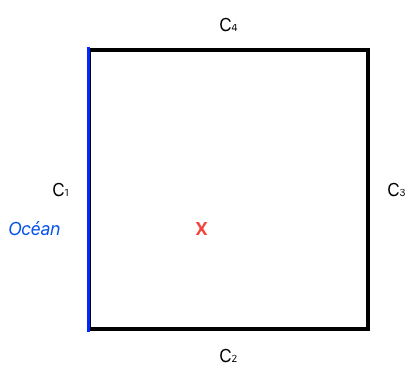

On considère donc pour la suite l'équation avec les conditions aux bords et initiales ci-dessous :

$$
\begin{cases}
\partial_t u = D \Delta u + ru(1 - \frac{u}{K}) & \text{sur }  \Omega,  t > 0\\
u = 0  & \text{sur } C_1 \\
\nabla u \cdot \overrightarrow{n} = 0 & \text{sur } C_2\cup C_3 \cup C_4 , \\
u(\mathbf{x}, 0) = u_0(\mathbf{x}) &  t = 0. \\
\end{cases}
\tag{P}
$$
avec:
$$
u_0(\mathbf{x})= \begin{cases}
2 & \text{pour } \mathbf{x} = (80,80) \\
0 & \text{sinon}
\end{cases}
$$

Remarque : les conditions aux bords sont de Dirichlet sur $C_1$ et de Neumann sur $C_2 \cup C_3 \cup C_4$.

### Discrétisation

Soit $u_{i,j}^{n}$ l'approximation de la densité au point $(x_{i},y_{j})$ au temps $t_{n}$.
Voici le schéma aux différences finies en espace et d'Euler explicite en temps :


$${
\frac{u_{i,j}^{n+1} - u_{i,j}^{n}}{\Delta t} =
D  \left[
\frac{u_{i+1,j}^{n} - 2u_{i,j}^{n} + u_{i-1,j}^{n}}{(\Delta x)^2}
+ \frac{u_{i,j+1}^{n} - 2u_{i,j}^{n} + u_{i,j-1}^{n}}{(\Delta y)^2}
\right]
+ r u_{i,j}^{n}\left( 1 - \frac{u_{i,j}^{n}}{K} \right)
}$$

### Implémentation sur Python

In [1]:
import numpy as np
import matplotlib.pyplot as plt

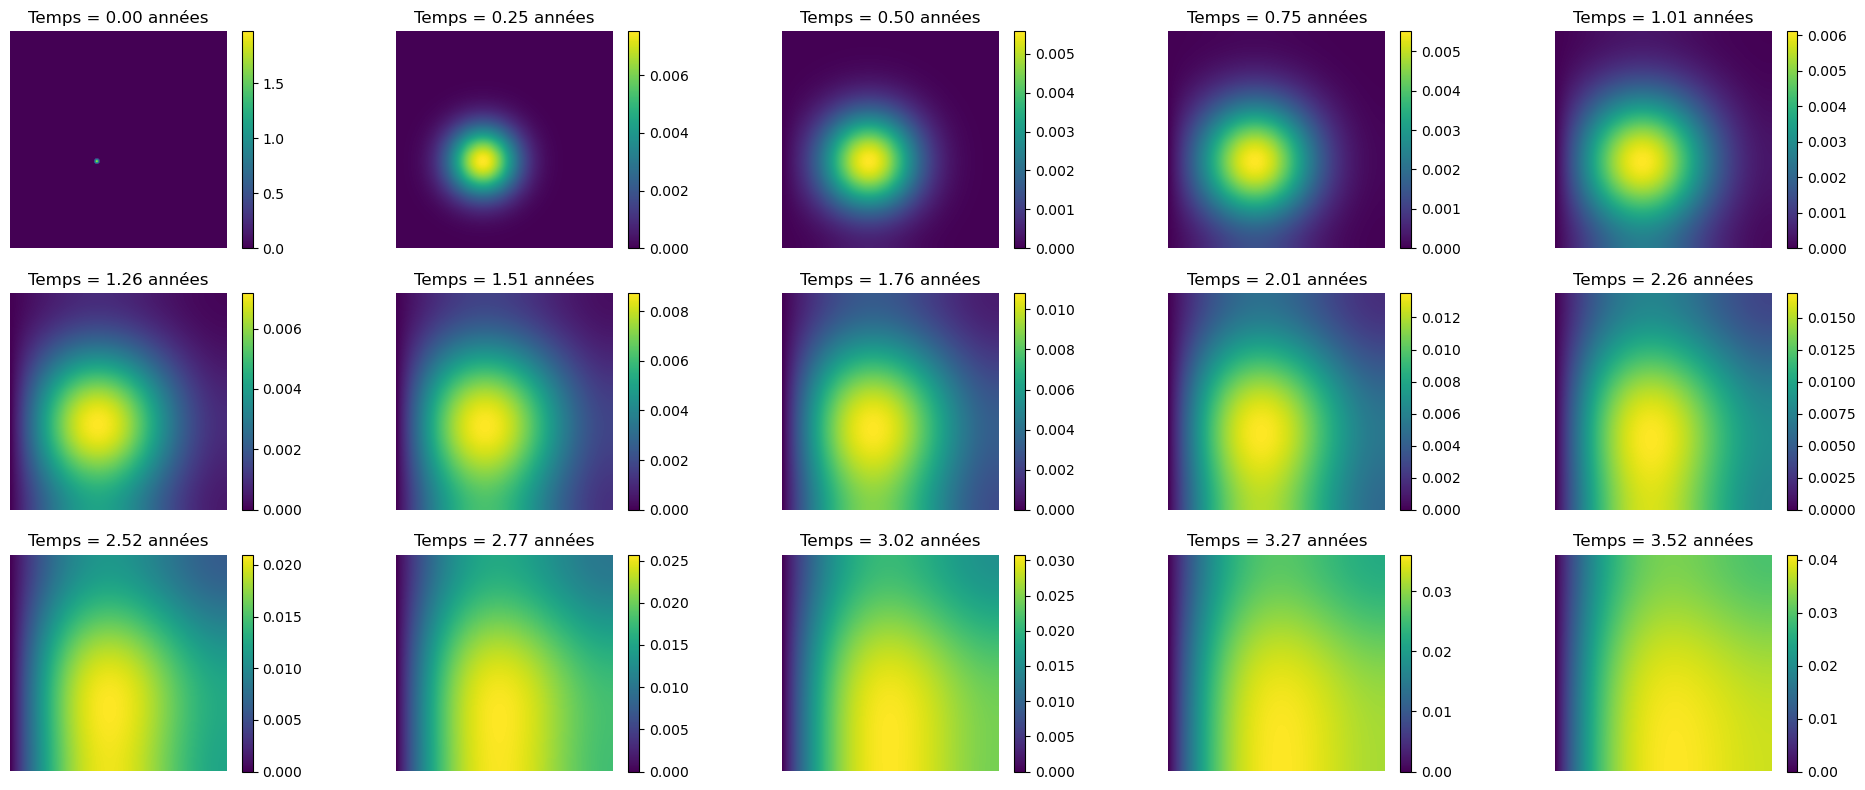

In [3]:
# Paramètres
D = 984       # Coefficient de propagation du frelon en km^2 par an
r = 1.66      # Taux de croissance de la population de frelons par an
K = 0.06      # Capacité de transport d'un nid en nid par km^2
L = 200       # Taille du domaine en km (carré L x L)
N_points = 201 # Nombre de points par dimension
dx = L / (N_points - 1)
dy = L / (N_points - 1)
dt = min(0.99 * dx**2 / (4 * D),0.99 * dy**2 / (4 * D))   # pas de temps respectant la stabilité du schéma

# Grille
x = np.linspace(0, L, N_points)
y = np.linspace(0, L, N_points)
u_grid = np.zeros((N_points, N_points))

# Condition initiale : disque de rayon 2 centré en (80,80) avec 2 nids
cx, cy, radius = 80, 80, 2
for i in range(N_points):
    for j in range(N_points):
        if (x[i]-cx)**2 + (y[j]-cy)**2 < radius**2:
            u_grid[i, j] = 2.0

# Fonction pour le calcul du laplacien
def laplacien(Z):
    LZ = np.zeros_like(Z)
    LZ[1:-1,1:-1] = ((Z[2:,1:-1] - 2*Z[1:-1,1:-1] + Z[:-2,1:-1]) / dx**2 + (Z[1:-1,2:] - 2*Z[1:-1,1:-1] + Z[1:-1,:-2]) / dy**2)
    return LZ

# Fonction pour le calcul de la réaction
def reaction(Z):
    RZ = np.zeros_like(Z)
    RZ[1:-1,1:-1] = r * Z[1:-1,1:-1] * (1 - Z[1:-1,1:-1] / K)
    return RZ

# Liste pour stocker les résultats
resultats = []

# Boucle en temps
n_steps = 15000
for n in range(n_steps):
    u_old = u_grid.copy()
    # Schéma des différences finies pour l'équation de Fisher
    u_grid[1:-1,1:-1] = u_old[1:-1,1:-1] + dt * (D * laplacien(u_old)[1:-1,1:-1] + reaction(u_old)[1:-1,1:-1])
    # Conditions de Dirichlet sur C1
    u_grid[0,:] = 0
    # Conditions de Neumann sur C2, C3 et C4
    u_grid[-1,:] = u_grid[-2, :]
    u_grid[:,0] = u_grid[:, 1]
    u_grid[:,-1] = u_grid[:, -2]
    
    # Stockage des résultats tous les 1000 pas
    if n % 1000 == 0:
        resultats.append(u_grid.copy())

# Affichage des résultats stockés
fig, axes = plt.subplots(3, 5, figsize=(20, 8))  # sur 3 lignes, 5 colonnes
axes = axes.flatten()

for i, u_resultat in enumerate(resultats):
    im = axes[i].imshow(u_resultat.T, origin='lower', extent=[0,L,0,L], cmap='viridis')
    axes[i].set_title(f'Temps = {i*1000*dt:.2f} années')
    axes[i].axis('off')
    fig.colorbar(im, ax=axes[i], fraction=0.046, pad=0.04)

plt.tight_layout()
plt.show()


### Analyse des résultats obtenus

On remarque ainsi que la propagation des nids de frelons se fait de manière très rapide : en 1 an, les nids de frelons sont présents dans déjà plus d'un quart du domaine (de taille comparable à une région), et en moins de 3 ans, les nids sont présents dans tout le domaine.

## **Une modélisation plus complexe**

### Domaine et conditions aux bords et initiales

Nous allons dans cette partie étudier un domaine plus grand, comparable à la France, avec des conditions au bords plus complexes et plus proches de la réalité.

Le domaine étudié est un hexagone régulier représentant la France. 

On choisira la même condition initiale qu'auparavant : seul deux nids de frelons sont présents à un endroit dans le sud-ouest du domaine. 

Les conditions aux bords prendront en compte le fait que les frelons ne peuvent survivre dans les océans et les mers, et on supposera qu'ils peuvent se propager vers les pays frontaliers.

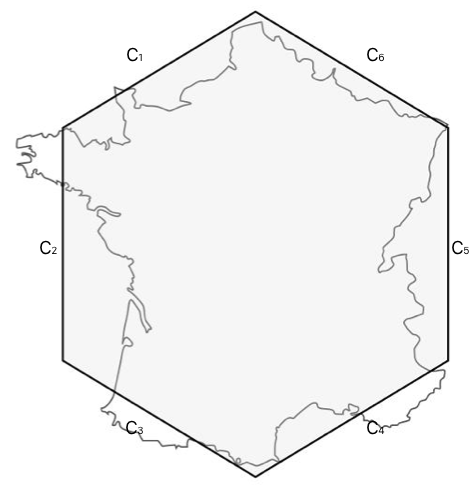

On considère donc l'équation avec les conditions aux bords et initiales ci-dessous :

$$
\begin{cases}
\partial_t u = D \Delta u + r u(1 - \frac{u}{K}) & \text{sur }  \Omega,  t > 0\\
u = 0  & \text{sur } C_1\cup C_2\cup C_4 \\
D \nabla u \cdot \overrightarrow{n} + \alpha u = 0 & \text{sur } C_3\cup C_5\cup C_6 , \\
u(\mathbf{x}, 0) = u_0(\mathbf{x}) &  t = 0. \\
\end{cases}
\tag{P}
$$
avec:
$$
u_0(\mathbf{x})= \begin{cases}
2 & \text{pour } \mathbf{x} = (-300,-400) \\
0 & \text{sinon}
\end{cases}
$$

Remarque : La condition initiale aux bords $C_3$, $C_5$ et $C_6$ a été modélisée par la condition de Robin$^{(4)}$, qui sous entend que la propagation est proportionnelle à la densité, avec un coefficient lié à la résistance du bord. Si ce coefficient est égal à 0, cela revient alors à une condition de Neummann. On choisira pour la suite $\alpha = 0.5$.

### Discrétisation

On considère l'équation :
$$
\partial_t u - D \Delta u - r u(1 - \frac{u}{K}) =0
$$

Soit une fonction test $v$ d'un espace de Hilbert approprié $V$.
On multiplie alors par $v$ on intègre sur $\Omega$ :
$$
\int_\Omega \partial_t u v d\textbf{x} - D \int_\Omega v\Delta u d\textbf{x} - r\int_\Omega v u(1 - \frac{u}{K})d\textbf{x} = 0 \ \ 
$$

On sait que $\nabla \cdot (v\nabla u) = \nabla v \nabla u + v \Delta u$, qui peut aussi s'écrire sous la forme:
$v \Delta u = \nabla \cdot (v\nabla u) - \nabla v \nabla u$ 

Donc l'équation précédente peut aussi s'écrire : 
$$
\int_\Omega \partial_t u v d\textbf{x} - D \int_\Omega \nabla \cdot (v\nabla u) d\textbf{x} + D \int_\Omega \nabla v \nabla u d\textbf{x}- r \int_\Omega v u(1 - \frac{u}{K})d\textbf{x} = 0 \ \ 
$$
D'après le théorème de la divergence :
$$
\int_\Omega \partial_t u v d\textbf{x} - D \int_{\partial\Omega} v\nabla u \cdot \overrightarrow{n} d\sigma + D \int_\Omega \nabla v \nabla u d\textbf{x}- r \int_\Omega v u(1 - \frac{u}{K})d\textbf{x} = 0 \ \ 
$$

Les conditions aux bords permettent d'écrire :
$$
\int_\Omega \partial_t u v d\textbf{x} + \alpha \int_{C_3\cup C_5\cup C_6} u v d\sigma + D \int_\Omega \nabla v \nabla u d\textbf{x}- r\int_\Omega v u(1 - \frac{u}{K})d\textbf{x} = 0 \ \ 
$$


Cette dernière équation est la forme faible du problème étudié. 

Le schéma d'Euler explicite en temps de cette équation, dans le cadre de la méthode des éléments finis est alors:
$$
\int_\Omega \frac{u^{n+1} - u^n}{\Delta t} v d\textbf{x} + \alpha \int_{C_3\cup C_5\cup C_6} u^{n} v d\sigma + D \int_\Omega \nabla v \nabla u^{n} d\textbf{x}- r\int_\Omega v u^{n}(1 - \frac{u^{n}}{K})d\textbf{x} = 0 \ \ 
$$

### Implémentation sur FreeFem++

On commence par créer le domaine et son maillage.

In [ ]:
//Maillage

int n = 40;
real R = 600.0;
real angle = pi/2;

real[int] X(6), Y(6);
for (int i=0; i<6; i++){
    real x0 = R * cos(i*pi/3);
    real y0 = R * sin(i*pi/3);
    X[i] = x0*cos(angle) - y0*sin(angle);
    Y[i] = x0*sin(angle) + y0*cos(angle);
}

border side1(t=0,1){ x = X[0] + (X[1]-X[0])*t; y = Y[0] + (Y[1]-Y[0])*t; label=1; }
border side2(t=0,1){ x = X[1] + (X[2]-X[1])*t; y = Y[1] + (Y[2]-Y[1])*t; label=2; }
border side3(t=0,1){ x = X[2] + (X[3]-X[2])*t; y = Y[2] + (Y[3]-Y[2])*t; label=3; }
border side4(t=0,1){ x = X[3] + (X[4]-X[3])*t; y = Y[3] + (Y[4]-Y[3])*t; label=4; }
border side5(t=0,1){ x = X[4] + (X[5]-X[4])*t; y = Y[4] + (Y[5]-Y[4])*t; label=5; }
border side6(t=0,1){ x = X[5] + (X[0]-X[5])*t; y = Y[5] + (Y[0]-Y[5])*t; label=6; }

mesh Th = buildmesh(side1(n) + side2(n) + side3(n) + side4(n) + side5(n) + side6(n));
plot(Th, wait=1);

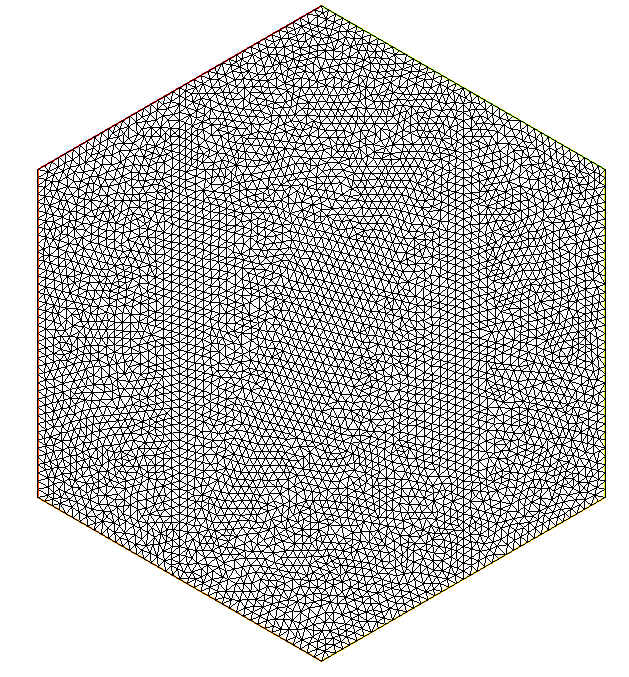

On donne par la suite l'ensemble des paramètres.

In [ ]:
/ Paramètres
real D = 984.0;
real r = 1.66;
real K = 0.06;
real alpha = 0.5;
real dt = 0.01; // pas de temps stable choisi en fonction de la résolution du maillage n
real Tfinal = 15.0;
int nTime = int(Tfinal/dt);

Puis on introduit les espaces fonctionnels et les fonctions.

In [ ]:
//Espace fonctionnel et fonctions

fespace Vh(Th, P1);
Vh u,v,uold;

Le problème peut alors être défini en imposant les conditions aux bords.

In [ ]:
//Définition du problème

macro grad(u) [dx(u), dy(u)] //

problem frelon(u,v) = 
    int2d(Th)(u*v/dt) 
  - int2d(Th)(uold*v/dt)
  + int1d(Th,3,5,6)(alpha*uold*v) // Robin
  + int2d(Th)(D*grad(uold)'*grad(v)) // Diffusion
  - int2d(Th)(r*v*uold*(1 - uold/K)) // terme non linéaire
  + on(1,2,4,u=0); // Dirichlet

real xinit=-300, yinit=-400, rinit=10;
u = ((x-xinit)^2 + (y-yinit)^2 < rinit^2 ) ? 2.0 : 0.0; // condition initiale localisée


On affiche alors l'évolution des solutions.

In [ ]:
// Exécution et affichage

for (real t = 0; t < Tfinal; t = t+dt)
{
    uold = u;
    frelon;
    plot(u, fill=true, value=true, cmm = "Temps t = " + t);
}

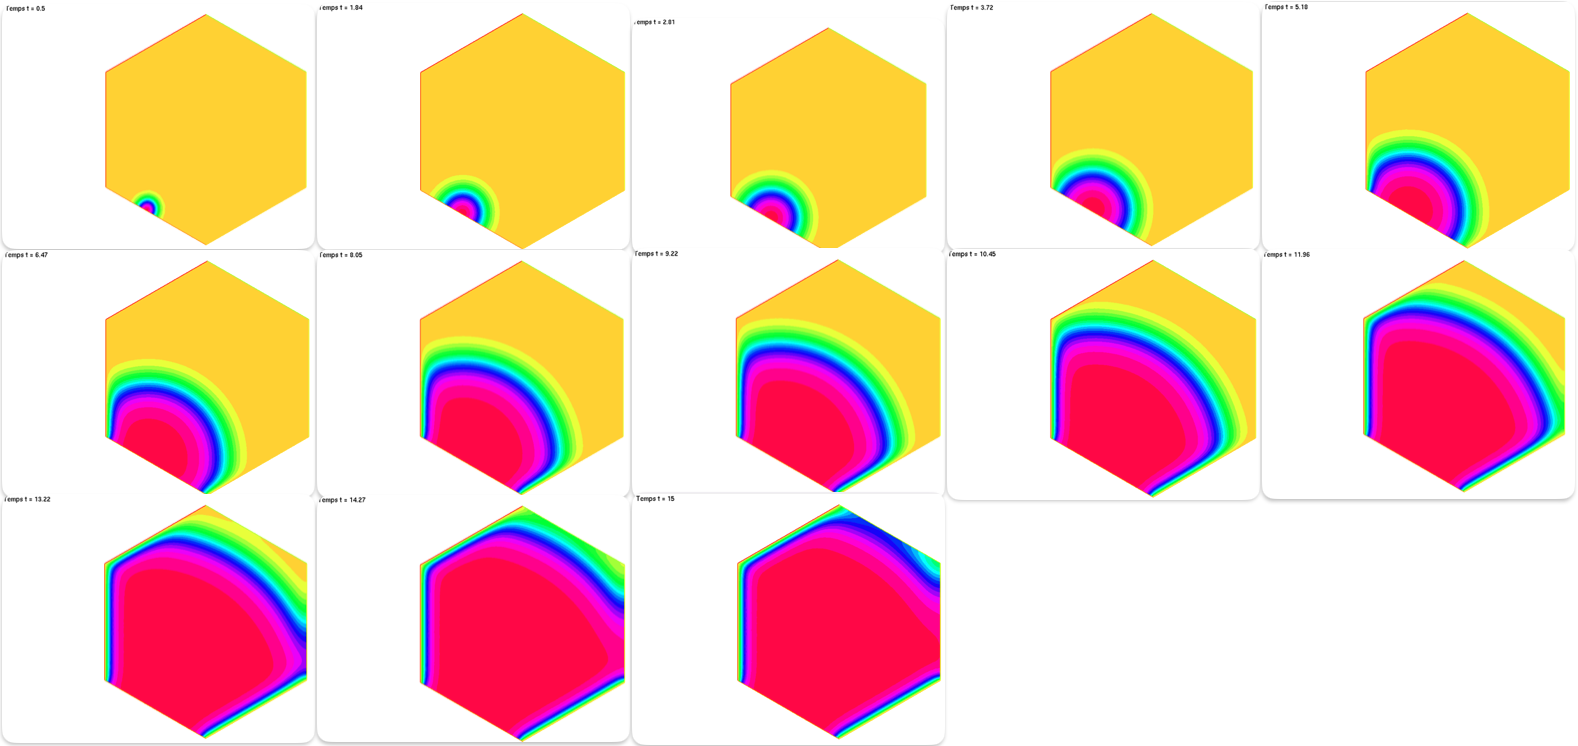

### Analyse des résultats obtenus

On remarque que dans ce modèle, au bout de 15 ans, les frelons ont envahi le domaine d'une superficie comparable à celle de la France.

Remarque : ce modèle pourrait être amélioré par l'ajout de zônes non propices à la présence de frelons (par exemple un massif et/ou des zônes trop froides).

## **Conclusion**

Le modèle de résolution proposé dans ce projet a permis de faire une prédiction de la propagation et de la croissance des populations de frelons assez proche des résultats présenté dans l'étude [*Rapid spread of the invasive yellow-legged hornet in France: the role of human-mediated dispersal and the effects of control measures*](https://besjournals.onlinelibrary.wiley.com/doi/10.1111/1365-2664.12724) .

Ces résultats soulignent la nécessité d’une action humaine rapide et coordonnée pour freiner la prolifération des frelons à pattes jaunes, dont l’impact est nocif pour l’écosystème local.